> **Note:**  
> - For **Urdu images**: The **background must be black**, and the **letter should be white**.  
> - For **English images**: The **background must be white**, and the **letter should also be white**.


# For Urdu Model

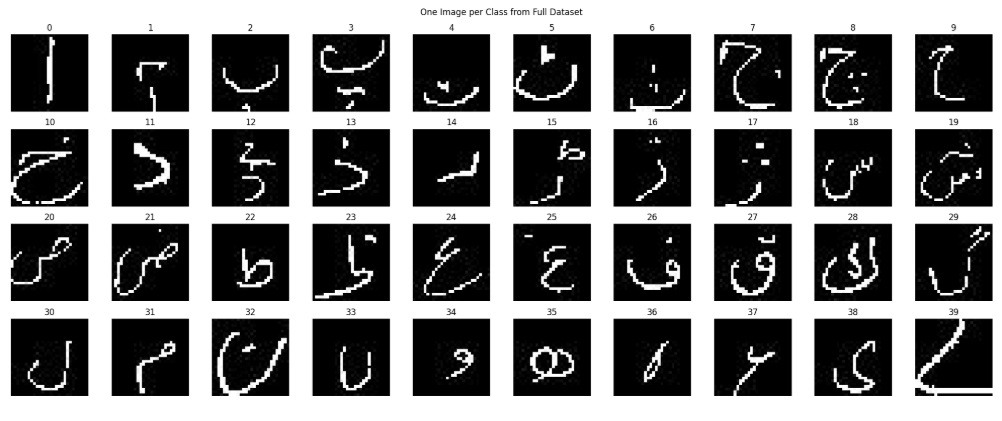

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import cv2
from keras.models import load_model

# Prediction utility with confidence display

In [2]:
def check_similarity_to_target(image_path, model, target_class, target_letter_name):
    
    # Load and preprocess image
    img = image.load_img(image_path, color_mode='grayscale', target_size=(28, 28))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    # Predict
    predictions = model.predict(img_array)[0]
    confidence = predictions[target_class] * 100

    # Display image with confidence to target letter
    plt.imshow(img_array[0].reshape(28, 28), cmap='gray')
    plt.title(f"Similarity to '{target_letter_name}' (Class {target_class}): {confidence:.2f}%")
    plt.axis('off')
    plt.show()

    print(f"The image is {confidence:.2f}% similar to the target letter '{target_letter_name}' (Class {target_class}).")
    return confidence

# Example usage

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


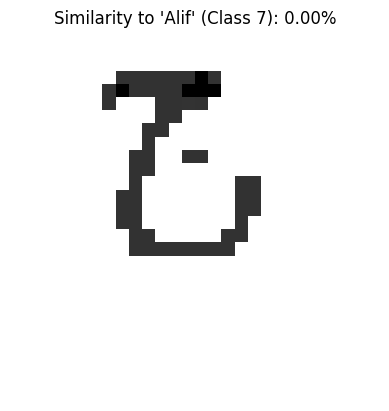

The image is 0.00% similar to the target letter 'Alif' (Class 7).
Confidence for 'Alif': 0.00%


In [3]:
# Example usage
if __name__ == '__main__':
    model = tf.keras.models.load_model('Models/urdu_model.keras')
    image_path = 'Untitled.png'              # Replace with your image
    target_class = 7                               # Replace with your target class index for 'Alif'
    target_letter_name = 'Alif'                    # Replace with your target letter name

    confidence = check_similarity_to_target(image_path, model, target_class, target_letter_name)
    print(f"Confidence for '{target_letter_name}': {confidence:.2f}%")

# _____________________________________________________________________________________

# For English Model

# Load your trained model

In [4]:

model = load_model('Models/english_model.keras')

# Define your label dictionary

In [5]:

word_dict = {
    0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',
    12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'
}

# Load and preprocess your new image 

In [6]:

def predict_image_with_target(image_path, target_letter):
    # Load and preprocess image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.bitwise_not(image)  # If needed
    image = cv2.resize(image, (28, 28))
    image = image / 255.0
    image = image.reshape(1, 28, 28, 1)

    # Predict
    prediction = model.predict(image)
    predicted_class = np.argmax(prediction)
    predicted_letter = word_dict[predicted_class]

    # Calculate similarity with target letter
    inverse_word_dict = {v: k for k, v in word_dict.items()}
    if target_letter.upper() in inverse_word_dict:
        target_class = inverse_word_dict[target_letter.upper()]
        similarity_percentage = prediction[0][target_class] * 100
        print(f"Predicted Letter: {predicted_letter}")
        print(f"The predicted image is {similarity_percentage:.2f}% similar to letter {target_letter.upper()}.")
    else:
        print(f"Target letter '{target_letter}' is not valid.")
        similarity_percentage = None

    # Display the image
    plt.imshow(image[0, :, :, 0], cmap='gray')
    plt.title(f'Predicted: {predicted_letter}')
    plt.axis('off')
    plt.show()

    return predicted_letter, similarity_percentage


# Example usage:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Predicted Letter: Y
The predicted image is 0.00% similar to letter V.


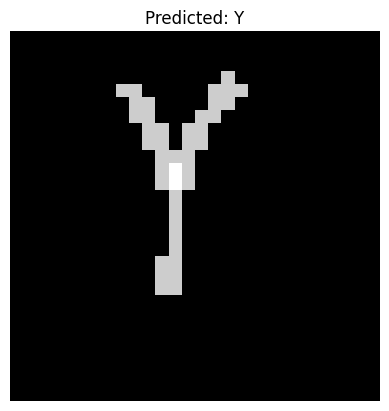

('Y', 0.0012811586202587932)

In [11]:

image_path = 'English test image.png'  
target_letter = 'V'  
predict_image_with_target(image_path, target_letter)